In [1]:
using MLDatasets, Flux
using Plots, Images
using Statistics, Random

In [2]:
include("../src/training.jl")

sim!

In [3]:
# load full training set
train_x, train_y = MNIST(split=:train)[:];

In [4]:
xtrain, ytrain = Flux.flatten(train_x), Flux.onehotbatch(train_y, 0:9);

In [5]:
tws = round.(Int64,(exp10.(range(3, stop = 5, length = 10))));
deltats = Int64.(ceil.(exp10.(range(1, stop = 5, length = 20))));

In [6]:
(m, n, z) = size(train_x)

(28, 28, 60000)

In [7]:
dnn = Chain(Dense(m*n, 5, tanh), 
    Dense(5, 5, tanh),
        Dense(5, 5, tanh),  
    Dense(5, 10),
    softmax)  ###3 hidden layers with 5 neurons each

Chain(
  Dense(784 => 5, tanh),                # 3_925 parameters
  Dense(5 => 5, tanh),                  # 30 parameters
  Dense(5 => 5, tanh),                  # 30 parameters
  Dense(5 => 10),                       # 60 parameters
  NNlib.softmax,
)                   # Total: 8 arrays, 4_045 parameters, 16.301 KiB.

In [8]:
batch_size = 50  
lambda2 = 1e-4  ###Regularization constant
learning_rate = 0.05; 
ndata = z;

In [9]:
loss, accuracy, mean_sd = sim!(dnn, tws,
    deltats, xtrain, ytrain, batch_size, learning_rate, lambda2, ndata);
###The time in which the loss and the accuracy are evaluated is printed

10
17
27
43
70
113
184
298
484
785
1275
2070
3360
5456
8859
14385
23358
37927
61585
100000


In [10]:
using LaTeXStrings

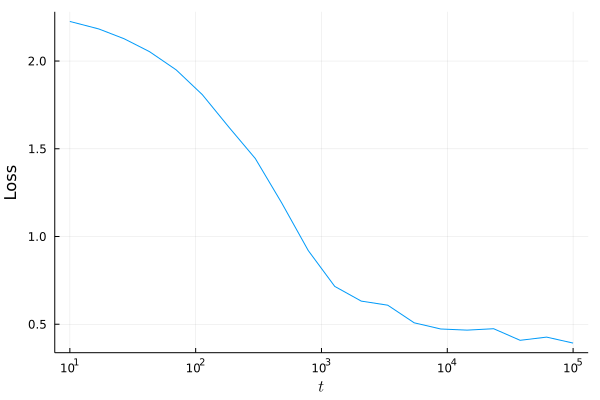

In [11]:
plot(deltats, loss, ylabel = "Loss", xlabel = L"t", xscale = :log10, label = "",
    xticks = exp10.(range(log10(deltats[1]), stop = 
            log10(deltats[end]), length = round.(Int64, log10(deltats[end]) - log10(deltats[1]))+1)))

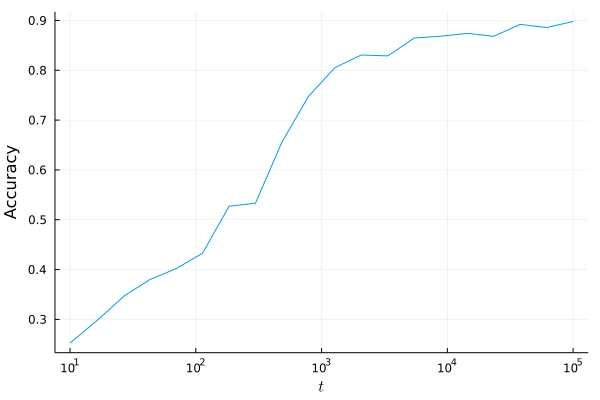

In [12]:
plot(deltats, accuracy, ylabel = "Accuracy", xlabel = L"t", xscale = :log10,
 xticks = exp10.(range(log10(deltats[1]), stop = 
            log10(deltats[end]), length = round.(Int64, log10(deltats[end]) - log10(deltats[1]))+1)), label = "")

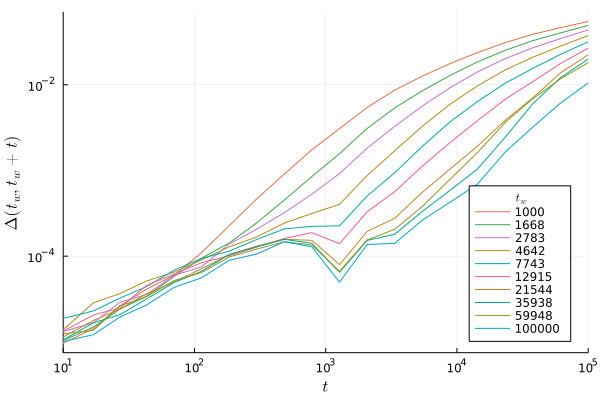

In [18]:
plot(deltats, mean_sd[1], color = :white, label = L"t_w")

plot!(deltats, mean_sd, xscale = :log10, yscale = :log10, label = tws',
    xlim = (deltats[1], deltats[end]), legend = :bottomright, xlabel = L"t",
ylabel = L"\Delta(t_w, t_w+t)")

In [19]:
###Example of how to extract t^* for a given tw for a given realization
using Dierckx, Roots

In [20]:
const Delta_star = 10^-3
t_stars = zeros(length(tws));

In [21]:
for i in 1:length(tws)
    nodes = deltats
    itp = Spline1D(nodes, mean_sd[i])
    t_stars[i] = find_zero(x-> itp(x) - Delta_star, (deltats[1], deltats[end]))   ##(t[1], t[end]) is the bracketing interval
 end

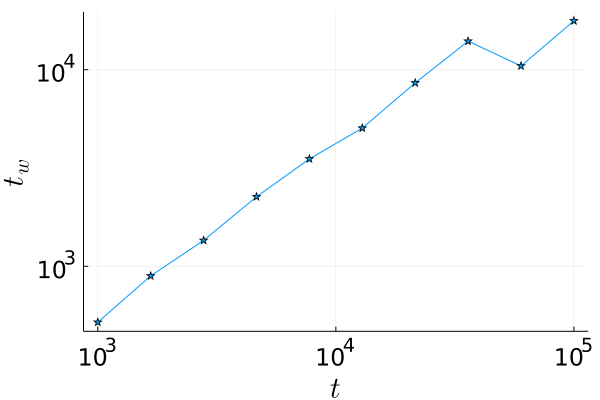

In [22]:
plot(tws, t_stars, xscale = :log10, yscale = :log10, xlabel = L"t", ylabel = L"t_w", label = "",
guidefontsize= 20, tickfontsize = 16, marker = :star)